# Probability

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Permutations
A Permutation of a set of objects is an arrangement of the objects in a certain order
### Total Permutation of set N
- The possible permutations of letters a,b and c is:
abc, acb, bac, bca, cab, cba
- We can calculate the number of possible permuations as n! [n factorial]
$$n!$$
- Example: abc = 3 items.
n! = 3! = 3x2x1 = 6
### Permutations without repetitions
- you can also take a subset of items in a permutation
- The number of permutations of a set of n objects taken r at a time is given by the following formula:
npr = n!/(n-r)!
### Permutations with repetitions
- The number of arrangements of n objects taken r at a time, with repetitions given by
$$ n^r $$


In [54]:
# Number of items in our input set
n = 4

# Number of iterm to select at one time
r = 2 

# Data
data = np.arange(n)

# Permutations with Replacement
print("Input data = {}".format(data))
print("Possible permutation (n^r)= ", n**r)

# compute and display actual permutations (with replacement)
from itertools import product
for cm in product(data, repeat=r):
    for c in cm:
        print(f'{c} ', end='')
    print()

Input data = [0 1 2 3]
Possible permutation (n^r)=  16
0 0 
0 1 
0 2 
0 3 
1 0 
1 1 
1 2 
1 3 
2 0 
2 1 
2 2 
2 3 
3 0 
3 1 
3 2 
3 3 


In [55]:
#Permutations without repetitions
from math import factorial
from itertools import permutations

print("Input data: ",data)
n_fact = factorial(n)
n_r_fact = factorial(n-r)
print("possible Permutations = ",n_fact/n_r_fact)

# Displaying actual permutations
for pm in permutations(data, r):
    for p in pm:
        print(f'{p} ', end='')
    print()

Input data:  [0 1 2 3]
possible Permutations =  12.0
0 1 
0 2 
0 3 
1 0 
1 2 
1 3 
2 0 
2 1 
2 3 
3 0 
3 1 
3 2 


## Combinations
- Unordered arrangements of objects are called combinations.

ex: A group of people selected for a team are the same group, no matter the order

ex: A pizza that is half tomato, half spinach is the same as one half spinach, half tomato.
### Combinations without replacemnts
- The number of combinations of a set of n objects taken r at a time is given by:
ncr = n!/r!(n-r)!

### Combinations with Replacements:
- ncr = r+n-1cr = (r+n-1)!/r!(n-1)!

In [56]:
# Combinations without Replacements:

print("Input data: ", data)

n_fact = factorial(n)
n_r_fact = factorial(n-r)
r_fact = factorial(r)

print("Possible Combinations: ", n_fact/(n_r_fact * r_fact))

from itertools import combinations

# Combinations
for cm in combinations(data, r):
    for c in cm:
        print(f'{c} ', end='')
    print()

Input data:  [0 1 2 3]
Possible Combinations:  6.0
0 1 
0 2 
0 3 
1 2 
1 3 
2 3 


In [57]:
# Combinations with Replacements:

print("Input data: ", data)

n_fact = factorial(n)
n_r_1_fact = factorial(r+1-1)
r_fact = factorial(r)

print("Possible Combinations: ", n_r_1_fact/(n_r_fact * r_fact))

from itertools import combinations_with_replacement

# Combinations
for cm in combinations_with_replacement(data, r):
    for c in cm:
        print(f'{c} ', end='')
    print()

Input data:  [0 1 2 3]
Possible Combinations:  0.5
0 0 
0 1 
0 2 
0 3 
1 1 
1 2 
1 3 
2 2 
2 3 
3 3 


## Probability

### Flipping a coin

In [58]:
# Probability of flipping heads
ph = 0.5

# Number of coins flips to simulate
num_flips = 200000
flips_lst = [x for x in range(1000,200000,1000)]
#flips_lst=[100]

# simulate coin flips
def flip_coin(N,p=0.5):
    prob = [p, (1-p)]
    return np.random.choice(['H','T'], size=N, p=prob)
prob_list = []
for num_flips in flips_lst:
    # Accumulate flips
    flips = flip_coin(num_flips)

    # count heads
    num_heads = np.sum(flips == 'H')
    prob_list.append(num_heads/num_flips)
# Results
#print("Flips: "," ".join(flips))
#print("number of heads: ",num_heads)
#print(f'P(H) = {num_heads/num_flips}( Number of Heads/ Toatal Flips)')


In [59]:
y=sorted(prob_list)

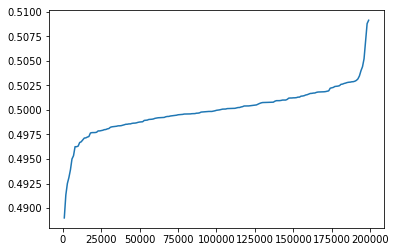

In [60]:
import seaborn as sns
sns.lineplot(flips_lst,y)

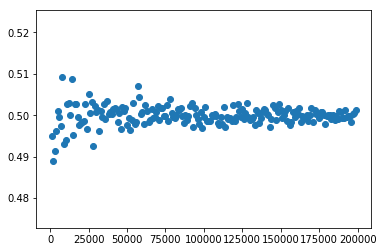

In [61]:
plt.scatter(flips_lst, prob_list)

In [62]:
np.mean(prob_list)

0.4999479653550293

In [63]:
# Probabilty of flipping heads
ph = 0.5

# How many times to flip a coin
num_flips = 250

# Function to print out sequence of results from a coin flip
def print_flips(flps, print_width = 50):
    
    # How many coin flip results we have displayed
    count = 0
    
    # We limit to 100 total
    if flps.shape[0] > 100:
        flips = flps[:-100]
    else:
        flips = flps[:]
    
    # Iterate through flips, displaying one at a time.
    for flip in flips:
        count += 1
        print(f'{flip}', end=' ')
        
        # We format to only display print_width flips on one line
        if (count % print_width) == 0:
            print() # Print Newline
    print() # Print newline
    
# Function to generate num_flips coin flips
def make_flips(num_flips, ph):
    
    # Flip coin num_flips number of times
    flips = flip_coin(num_flips, ph)
    
    # Display results
    print_flips(flips)

    # Accumulate heads
    num_heads = np.sum(flips == 'H')

    # Display results
    print(f"Number of Heads: {num_heads}")
    print(f'P(H) = {num_heads/num_flips} (Number of Heads/Total Flips)')

make_flips(num_flips, ph)

H T H T H T T T H H T T H T T T H H H T T T H T H T T H T H H H H T H H T H H T T H H H T T T H T H 
H H H T T H T H H H T H H T T T T T H H H T H T T H T T H H H H T T H H H H T H H T H H T T H H H T 
T H T H T H T H H H H T T H H H T H H H T H T H T H H T T T T H T T T T T H T H H T T T H H H H T T 

Number of Heads: 142
P(H) = 0.568 (Number of Heads/Total Flips)


Imagine you have a coin and fliped it for 5 times and noted the outcome, what is the probability that the outcome has atleast 3 Heads in it>

In [64]:
# Solving Theoretically
  
# Returns factorial of n 
def fact(n): 
    res = 1
    for i in range(2, n+1): 
        res = res * i 
    return res 

def nCr(n, r): 
    return (fact(n) / (fact(r)  
                * fact(n - r))) 

In [65]:
( nCr(5,3)*(0.5**3)*(0.5**2) ) + ( nCr(5,4)*(0.5**4)*(0.5**1) ) + ( nCr(5,5)*(0.5**5)*(0.5**0) )

0.5

In [66]:
# Solving by using Simulaitons

def make_group_flips(num_flips, ph):
    
    # Flip coin num_flips number of times
    flips = flip_coin(num_flips, ph)
    return flips

five_group_flips = []
for i in range(1000000):
    five_group_flips.append(make_group_flips(5, ph))


In [68]:
req_num_flips = 0
for i in range(len(five_group_flips)):
    H_count = 0
    for j in range(5):
        if five_group_flips[i][j] == 'H':
            H_count += 1
    if H_count >= 3:
        req_num_flips += 1

# Display results
print(f"Number of Exps having more than 3 Heads: {req_num_flips}")
print(f'P(3H) = {req_num_flips/len(five_group_flips)} (Number of Heads/Total Flips)')

Number of Exps having more than 3 Heads: 499643
P(3H) = 0.499643 (Number of Heads/Total Flips)
